In [17]:
# Problem:
#   Set up the environment so we can work with tabular data and dates for the assignment.
# Solution:
#   Import pandas and numpy for data processing. These libraries will be used in ALL tasks
#   (Task 1: merging, Task 2–4: modeling, Task 5: device usage analysis).

import pandas as pd
import numpy as np


In [18]:
energy_df = pd.read_csv('energy_data.csv')
weather_df = pd.read_csv('weather_data.csv')

display(energy_df.head())
display(weather_df.head())

display({"Energy shape": energy_df.shape, "Weather shape": weather_df.shape})


,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


{'Energy shape': (17520, 18), 'Weather shape': (8760, 13)}

In [19]:
display(energy_df.columns)
display(weather_df.columns)

display(energy_df.head(3))
display(weather_df.head(3))

Index(['Date & Time', 'use [kW]', 'gen [kW]', 'Grid [kW]', 'AC [kW]',
       'Furnace [kW]', 'Cellar Lights [kW]', 'Washer [kW]',
       'First Floor lights [kW]', 'Utility Rm + Basement Bath [kW]',
       'Garage outlets [kW]', 'MBed + KBed outlets [kW]',
       'Dryer + egauge [kW]', 'Panel GFI (central vac) [kW]',
       'Home Office (R) [kW]', 'Dining room (R) [kW]', 'Microwave (R) [kW]',
       'Fridge (R) [kW]'],
      dtype='object')

Index(['temperature', 'icon', 'humidity', 'visibility', 'summary', 'pressure',
       'windSpeed', 'cloudCover', 'time', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.0,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.0,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.0,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0


In [20]:
# Fix datetime into a proper datetime column, then extract a pure 'date' column for daily grouping.

energy_df = energy_df.copy()

energy_df['datetime'] = pd.to_datetime(energy_df['Date & Time'], errors='coerce')
energy_df['date'] = energy_df['datetime'].dt.date

display(energy_df[['Date & Time', 'datetime', 'date']].head())


,Date & Time,datetime,date
0,2014-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01
1,2014-01-01 00:30:00,2014-01-01 00:30:00,2014-01-01
2,2014-01-01 01:00:00,2014-01-01 01:00:00,2014-01-01
3,2014-01-01 01:30:00,2014-01-01 01:30:00,2014-01-01
4,2014-01-01 02:00:00,2014-01-01 02:00:00,2014-01-01


In [21]:
# create a 'date' column in the weather data that matches the energy data's 'date'

weather_df = weather_df.copy()

weather_df['datetime'] = pd.to_datetime(weather_df['time'], unit='s', errors='coerce')
weather_df['date'] = weather_df['datetime'].dt.date

display(weather_df[['time', 'datetime', 'date']].head())


,time,datetime,date
0,1388534400,2014-01-01 00:00:00,2014-01-01
1,1388538000,2014-01-01 01:00:00,2014-01-01
2,1388541600,2014-01-01 02:00:00,2014-01-01
3,1388545200,2014-01-01 03:00:00,2014-01-01
4,1388548800,2014-01-01 04:00:00,2014-01-01


1. Examine the data, parse the time fields wherever necessary. Take the sum of the energy usage 
(Use [kW]) to get per day usage and merge it with weather data (10 Points). 

In [22]:
# Examine the data, parse the time fields wherever necessary. Take the sum of the energy usage 


energy_df = energy_df.copy()

daily_energy_df = (
    energy_df
    .groupby('date', as_index=False)['use [kW]']
    .sum()
    .rename(columns={'use [kW]': 'daily_use_kW'})
)

display(daily_energy_df.head())
display({"Daily energy shape": daily_energy_df.shape})

,date,daily_use_kW
0,2014-01-01,65.013592
1,2014-01-02,32.305336
2,2014-01-03,31.164468
3,2014-01-04,45.287782
4,2014-01-05,36.316643


{'Daily energy shape': (365, 2)}

In [23]:
#   The weather data is recorded multiple times per day with hourly timestamps
#   but our energy data has been summed to one row per day.
#   Group weather_df by 'date' and compute daily values
#   This creates daily_weather_df with one row per date for merging


weather_df = weather_df.copy()

daily_weather_df = (
    weather_df
    .groupby('date', as_index=False)
    .mean(numeric_only=True)  # averages all numeric weather features per day
)

display(daily_weather_df.head())
display({"Daily weather shape": daily_weather_df.shape})


,date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417


{'Daily weather shape': (365, 12)}

In [24]:
#  Inner merge on the shared 'date' column between daily_energy_df
#  and daily_weather_df to create merged_df with one row per day that has both
#  daily_use_kW and daily weather statistics.

merged_df = pd.merge(
    daily_energy_df,
    daily_weather_df,
    on='date',
    how='inner'
)

display(merged_df.head())
display({"Merged shape": merged_df.shape})


,date,daily_use_kW,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417


{'Merged shape': (365, 13)}

2. Split the data obtained from step 1, into training and testing sets. The aim is to predict the usage 
for each day in the month of December using the weather data, so split accordingly. The usage as 
per devices should be dropped, only the “use [kW]” column is to be used for prediction from the 
dataset (5 points).

In [25]:
#   Splitting data so December is test set, rest is training/validation.


merged_df = merged_df.copy()
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

is_december = merged_df['date'].dt.month == 12
is_not_december = merged_df['date'].dt.month != 12

display(merged_df[is_december].head()) 
display({"December count": is_december.sum(),
         "Non-December count": is_not_december.sum()})


,date,daily_use_kW,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
334,2014-12-01,30.550010,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,1.417433e+09,226.958333,0.000000,36.748750,0.000000
335,2014-12-02,31.748857,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,1.417520e+09,166.625000,0.000000,21.006250,0.000000
336,2014-12-03,28.773233,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,1.417606e+09,119.333333,0.010754,33.994167,0.240833
337,2014-12-04,39.484491,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,1.417693e+09,286.125000,0.000371,22.777500,0.010000
338,2014-12-05,33.342503,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,1.417779e+09,63.833333,0.000000,18.462083,0.000000


{'December count': np.int64(31), 'Non-December count': np.int64(334)}

In [26]:
#   Keep 'daily_use_kW' in the training set as the label.
#   Remove 'daily_use_kW' from the test set as the y value.

train_df = merged_df[is_not_december].copy()
test_df  = merged_df[is_december].copy()

test_features_df = test_df.drop(columns=['daily_use_kW'])

display(train_df.head())
display(test_features_df.head())

display({
    "Train rows": len(train_df),
    "Test rows": len(test_df),
    "Test features shape": test_features_df.shape
})


,date,daily_use_kW,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417


,date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
334,2014-12-01,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,1.417433e+09,226.958333,0.000000,36.748750,0.000000
335,2014-12-02,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,1.417520e+09,166.625000,0.000000,21.006250,0.000000
336,2014-12-03,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,1.417606e+09,119.333333,0.010754,33.994167,0.240833
337,2014-12-04,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,1.417693e+09,286.125000,0.000371,22.777500,0.010000
338,2014-12-05,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,1.417779e+09,63.833333,0.000000,18.462083,0.000000


{'Train rows': 334, 'Test rows': 31, 'Test features shape': (31, 12)}

3. Linear Regression - Predicting Energy Usage: 
Set up a simple linear regression model to train, and then predict energy usage for each day in the 
month of December using features from weather data (Note that you need to drop the “use [kW]” 
column in the test set first). How well/badly does the model work? (Evaluate the correctness of 
your predictions based on the original “use [kW]” column). Calculate the Root mean squared error 
of your model. 
Finally generate a csv dump of the predicted values. Format of csv: Two columns, first should be 
the date and second should be the predicted value. (20 points)

In [27]:
#   Build matrices X_train, y_train, X_test using only numerical weather columns.
#   Drop 'date' and any non-numeric columns.


feature_cols = [
    'temperature', 'humidity', 'visibility', 'pressure', 'windSpeed',
    'cloudCover', 'time', 'windBearing', 'precipIntensity', 'dewPoint',
    'precipProbability'
]

X_train = train_df[feature_cols].copy()
y_train = train_df['daily_use_kW'].copy()

X_test = test_features_df[feature_cols].copy()

display(X_train.head())
display(y_train.head())
display(X_test.head())

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000
1,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583
2,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000
3,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000
4,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417


0    65.013592
1    32.305336
2    31.164468
3    45.287782
4    36.316643
Name: daily_use_kW, dtype: float64

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
334,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,1.417433e+09,226.958333,0.000000,36.748750,0.000000
335,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,1.417520e+09,166.625000,0.000000,21.006250,0.000000
336,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,1.417606e+09,119.333333,0.010754,33.994167,0.240833
337,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,1.417693e+09,286.125000,0.000371,22.777500,0.010000
338,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,1.417779e+09,63.833333,0.000000,18.462083,0.000000


In [28]:
#  Train a linear regression model using X_train and y_train.

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)


display({"Intercept": linreg.intercept_, "Coefficients": linreg.coef_})

{'Intercept': np.float64(390.0203673746911),
 'Coefficients': array([-3.99636676e+00, -2.07302631e+02, -1.62430629e+00,  3.30564371e-02,
        -5.05660639e-01, -8.96034035e+00, -1.52464963e-07,  1.21491315e-02,
         2.98576046e+02,  4.63253527e+00, -6.27155723e+00])}

In [29]:
# Testing the model on December data
y_pred = linreg.predict(X_test)
display(y_pred[:10])

array([28.67677085, 29.1339719 , 15.52628226, 28.94640995, 21.44330772,
       18.03313008, 20.08357821, 21.79444084, 17.52880388, 15.1622405 ])

In [31]:
#   Evaluate model performance on December test set using RMSE

from sklearn.metrics import mean_squared_error
import numpy as np

y_test_actual = test_df['daily_use_kW'].values

mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)

display({"RMSE": rmse})

{'RMSE': np.float64(10.731619230473463)}

In [32]:
# Exporting linear regression predictions to CSV
pred_df = test_df[['date']].copy()
pred_df['predicted_daily_use_kW'] = y_pred

display(pred_df.head())

pred_df.to_csv('linear_regression_predictions.csv', index=False)

,date,predicted_daily_use_kW
334,2014-12-01,28.676771
335,2014-12-02,29.133972
336,2014-12-03,15.526282
337,2014-12-04,28.946410
338,2014-12-05,21.443308


4. Logistic Regression - Temperature classification: 
Using only weather data we want to classify if the temperature is high or low. Let's assume 
temperature greater than or equal to 35 is ‘high’ and below 35 is ‘low’. Set up a logistic regression 
model to classify the temperature for each day in the month of December. Calculate the F1 score 
for the model. 


In [33]:
#   Create a new binary feature 'temp_high' in merged_df
#   that is 1 if temperature >= 35 degrees Celsius, else 0.
merged_df = merged_df.copy()

merged_df['temp_high'] = (merged_df['temperature'] >= 35).astype(int)

display(merged_df[['date', 'temperature', 'temp_high']].head(15))


,date,temperature,temp_high
0,2014-01-01,20.110833,0
1,2014-01-02,16.382500,0
2,2014-01-03,6.256667,0
3,2014-01-04,2.711667,0
4,2014-01-05,17.654167,0
5,2014-01-06,39.084167,1
6,2014-01-07,13.882917,0
7,2014-01-08,9.087917,0
8,2014-01-09,18.169583,0
9,2014-01-10,20.532500,0


In [34]:
#   Reuse the same weather feature columns from Task 3.
#   Use merged_df with the temp_high label.
#   Split into December vs non-December sets from Task 2.

feature_cols = [
    'temperature', 'humidity', 'visibility', 'pressure', 'windSpeed',
    'cloudCover', 'time', 'windBearing', 'precipIntensity', 'dewPoint',
    'precipProbability'
]

# Training = Non-December
X_train_logit = merged_df[is_not_december][feature_cols].copy()
y_train_logit = merged_df[is_not_december]['temp_high'].copy()

# Testing = December
X_test_logit = merged_df[is_december][feature_cols].copy()
y_test_logit = merged_df[is_december]['temp_high'].copy()

display(X_train_logit.head())
display(y_train_logit.head())
display(X_test_logit.head())
display(y_test_logit.head())

display({
    "Train rows": len(X_train_logit),
    "Test rows": len(X_test_logit)
})

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000
1,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583
2,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000
3,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000
4,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417


0    0
1    0
2    0
3    0
4    0
Name: temp_high, dtype: int64

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
334,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,1.417433e+09,226.958333,0.000000,36.748750,0.000000
335,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,1.417520e+09,166.625000,0.000000,21.006250,0.000000
336,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,1.417606e+09,119.333333,0.010754,33.994167,0.240833
337,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,1.417693e+09,286.125000,0.000371,22.777500,0.010000
338,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,1.417779e+09,63.833333,0.000000,18.462083,0.000000


334    1
335    0
336    1
337    1
338    0
Name: temp_high, dtype: int64

{'Train rows': 334, 'Test rows': 31}

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_logit, y_train_logit)

display({
    "Intercept": logreg.intercept_,
    "Coefficients": logreg.coef_
})

{'Intercept': array([4.9082078e-19]),
 'Coefficients': array([[ 5.23313770e-16,  1.84478022e-18,  5.80231600e-18,
          4.62024787e-16, -1.50958629e-17,  1.49211295e-18,
          8.28565926e-10, -4.15635509e-16,  4.81793280e-20,
          5.48164051e-16,  6.95501488e-19]])}

In [36]:
from sklearn.metrics import f1_score

y_pred_logit = logreg.predict(X_test_logit)
display(y_pred_logit[:10])

f1 = f1_score(y_test_logit, y_pred_logit)
display({"F1 Score": f1})

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

{'F1 Score': 0.5909090909090909}

In [37]:
# Exporting logistic regression predictions to CSV
logit_pred_df = merged_df[is_december][['date']].copy()
logit_pred_df['temp_classification'] = y_pred_logit

display(logit_pred_df.head())

logit_pred_df.to_csv('logistic_regression_temperature_classification.csv', index=False)

,date,temp_classification
334,2014-12-01,1
335,2014-12-02,1
336,2014-12-03,1
337,2014-12-04,1
338,2014-12-05,1


Energy usage data Analysis: 
We want to analyze how different devices are being used in different times of the day. - Is the washer being used only during the day? - During what time of the day is AC used most? 
There are a number of questions that can be asked. 
For simplicity, let’s divide a day in two parts: - Day: 6AM - 7PM - Night: 7PM - 6AM 
Analyze the usage of any two devices of your choice during the ‘day’ and ‘night’. Plot these 
trends. Explain your findings. (10 points)

In [38]:
#   Extract the hour from the 'datetime' column into a new 'hour' column
#   so we can filter (6 ≤ hour < 19) for "day" and (hour >= 19 or hour < 6) for "night".

energy_df = energy_df.copy()
energy_df['hour'] = energy_df['datetime'].dt.hour

display(energy_df[['datetime', 'hour']].head())


,datetime,hour
0,2014-01-01 00:00:00,0
1,2014-01-01 00:30:00,0
2,2014-01-01 01:00:00,1
3,2014-01-01 01:30:00,1
4,2014-01-01 02:00:00,2


In [39]:
#   Create a new column 'period' for day or night interval

energy_df = energy_df.copy()

energy_df['period'] = np.where(
    (energy_df['hour'] >= 6) & (energy_df['hour'] < 19),
    'day',
    'night'
)

display(energy_df[['datetime', 'hour', 'period']].head(12))


,datetime,hour,period
0,2014-01-01 00:00:00,0,night
1,2014-01-01 00:30:00,0,night
2,2014-01-01 01:00:00,1,night
3,2014-01-01 01:30:00,1,night
4,2014-01-01 02:00:00,2,night
5,2014-01-01 02:30:00,2,night
6,2014-01-01 03:00:00,3,night
7,2014-01-01 03:30:00,3,night
8,2014-01-01 04:00:00,4,night
9,2014-01-01 04:30:00,4,night


In [ ]:
#   Compare day vs night using period column for the analysis with mean.

devices = ['AC [kW]', 'Washer [kW]']

day_night_usage = (
    energy_df.groupby('period')[devices]
    .mean()
)

display(day_night_usage)

,AC [kW],Washer [kW]
period,,
day,0.040263,0.004598
night,0.146596,0.001258


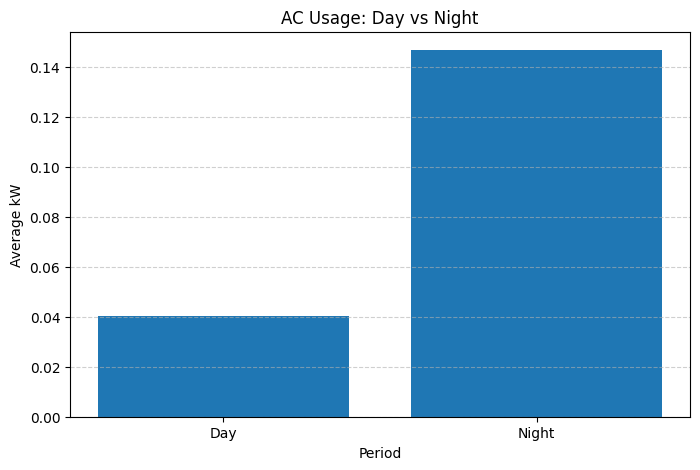

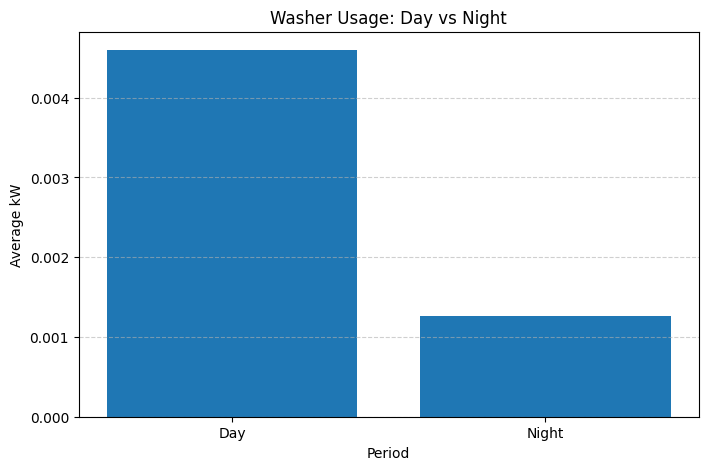

In [42]:
import matplotlib.pyplot as plt

# Extract values
ac_day = day_night_usage.loc['day', 'AC [kW]']
ac_night = day_night_usage.loc['night', 'AC [kW]']

washer_day = day_night_usage.loc['day', 'Washer [kW]']
washer_night = day_night_usage.loc['night', 'Washer [kW]']

# AC
plt.figure(figsize=(8, 5))
plt.bar(['Day', 'Night'], [ac_day, ac_night])
plt.title('AC Usage: Day vs Night')
plt.ylabel('Average kW')
plt.xlabel('Period')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Washer
plt.figure(figsize=(8, 5))
plt.bar(['Day', 'Night'], [washer_day, washer_night])
plt.title('Washer Usage: Day vs Night')
plt.ylabel('Average kW')
plt.xlabel('Period')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

AC consumption is higher at night than during the day.
This isa probably because of heating cycles or nighttime cooling/heating when outside temperature drops.
Since AC and heating responds to temperature, nighttime temperature changes might cause it to work more.

Washer usage is higher during the day than at night.
This makes sense since people use laundry in the day time.